John-Henry Pezzuto - HW6

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

biden = pd.read_csv('biden.csv')
biden.head()

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


### 1a) Split the data, Plot the tree, MSE

In [5]:
y = biden['biden'].values
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 406.672049146


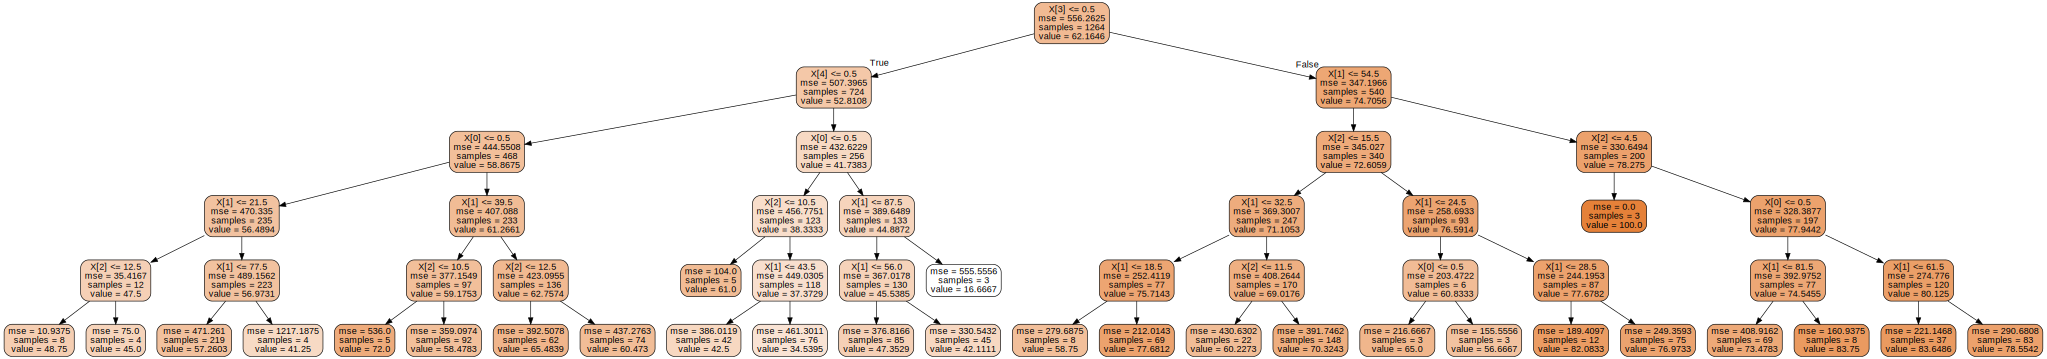

In [6]:
see_the_tree = export_graphviz(
    tree,
    out_file=None,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(see_the_tree)
graph.render('see_the_tree')
graph

X[0] = female; X[1] = age; X[2] = educ; X[3]= dem; X[4] = rep

The first node splits democrats and non-democrats. It seems democrats especially like Biden. If you are not a democrat, the tree then checks to see if you are a republican. If you are a democrat, the tree checks to see if you are over 54.5 years old and so on. Roughly, it seems like young democratic women are Biden's biggest fans.

### 1b) Now plot another tree

In [38]:
for d in range(1,20):
    tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=d)
    tree2.fit(X_train, y_train)
    y_pred2 = tree2.predict(X_test)
    MSE2 = mean_squared_error(y_test, y_pred2)
    print('Max depth = {}; MSE ={}'.format(d, MSE2))

tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=3)
tree2.fit(X_train, y_train)
see_the_tree2 = export_graphviz(
    tree2,
    out_file=None,
    rounded=True,
    filled=True,
)



Max depth = 1; MSE =420.0224529349668
Max depth = 2; MSE =400.06539818418173
Max depth = 3; MSE =396.1937146321307
Max depth = 4; MSE =404.59602362340974
Max depth = 5; MSE =411.80592737244535
Max depth = 6; MSE =418.4284401948414
Max depth = 7; MSE =435.76906119360757
Max depth = 8; MSE =464.8931449707398
Max depth = 9; MSE =462.3674415271974
Max depth = 10; MSE =468.3329719590837
Max depth = 11; MSE =473.1109721765993
Max depth = 12; MSE =480.6369063941235
Max depth = 13; MSE =479.1313267112563
Max depth = 14; MSE =480.25506771976944
Max depth = 15; MSE =481.7028660878889
Max depth = 16; MSE =480.55067869359414
Max depth = 17; MSE =480.6980083436862
Max depth = 18; MSE =482.81587206375985
Max depth = 19; MSE =480.55067869359414


The tree has the lowest MSE at depth 3. This pruned tree has a lower MSE than the previous tree

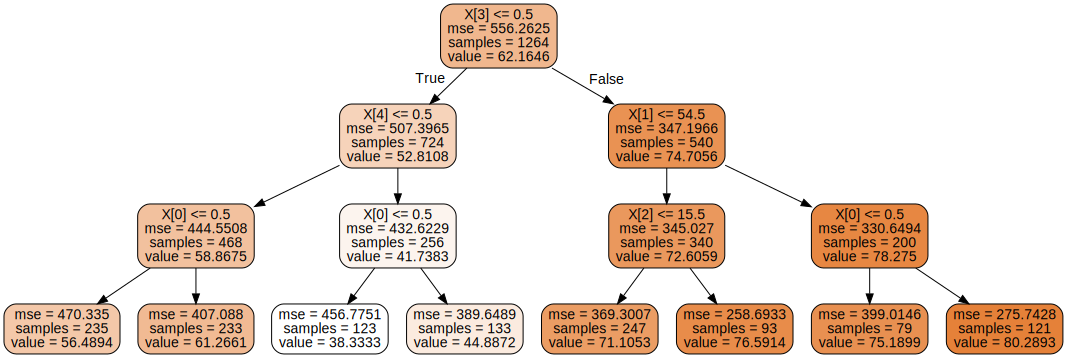

In [8]:
graph = graphviz.Source(see_the_tree2)
graph.render('see_the_tree2')
graph

The tree can be described the same way I did above. See above tree for description

### 1c) Use the bagging approach to estimate a tree

In [13]:
tree3 = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                             max_samples=100, bootstrap=True, oob_score=True, random_state=15)
tree3.fit(X, y)
tree3.score(X, y)
y_pred3 = tree3.oob_prediction_
MSE3 = mean_squared_error(y, y_pred3)
print('MSE=', MSE3)

MSE= 406.032312736


In [19]:
importances = np.mean([
    tree.feature_importances_ for tree in tree3.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
features = ['female', 'age', 'dem', 'rep', 'educ']
for f in range(len(features)):
    print(f'{f+1}. {features[f]}: {importances[indices[f]]}')

Feature ranking:
1. female: 0.443570011693861
2. age: 0.2003583317146969
3. dem: 0.19035439885461736
4. rep: 0.10602964513451556
5. educ: 0.059687612602309065


Female is by far the most important variable. Age and democratic status are then roughly the same at half the importance level. Being a republican is about half as important as age and democratic status. Lastly education is about half the importance level as republican status.

### 1d) Use the random forest approach to estimate a tree

In [32]:
tree4 = RandomForestRegressor(max_features = 1, n_estimators=53,  bootstrap=True,
                                  oob_score=True, random_state=15)
tree4.fit(X, y)

y_pred4 = tree4.oob_prediction_
MSE4 = mean_squared_error(y, y_pred4)
print('For m = 1, MSE=', MSE4)

For m = 1, MSE= 536.775016744


In [33]:
tree5 = RandomForestRegressor(max_features = 2, n_estimators=53,  bootstrap=True,
                                  oob_score=True, random_state=15)
tree5.fit(X, y)

y_pred5 = tree5.oob_prediction_
MSE5 = mean_squared_error(y, y_pred5)
print('For m = 2, MSE=', MSE5)

For m = 2, MSE= 535.286787901


In [34]:
tree6 = RandomForestRegressor(max_features = 3, n_estimators=53,  bootstrap=True,
                                  oob_score=True, random_state=15)
tree6.fit(X, y)

y_pred6 = tree6.oob_prediction_
MSE6 = mean_squared_error(y, y_pred6)
print('For m = 3, MSE=', MSE6)

For m = 3, MSE= 537.282346826


In [36]:
importances = tree5.feature_importances_
std = np.std([tree.feature_importances_ for tree in tree5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

features = ['female', 'age', 'dem', 'rep', 'educ']
for f in range(X.shape[1]):
     print(f'{f+1}. {features[f]}: {importances[indices[f]]}')

Feature ranking:
1. female: 0.50534801691877
2. age: 0.18967495952031216
3. dem: 0.153193663547305
4. rep: 0.13009443875741544
5. educ: 0.021688921256197483


The features follow roughly the same importance as before. Female is the most important feature by far, followed my age at a little less than half the importance. Age is followed closely by democratic status, which is then followed closely by republican status. Education again seems unimportant.

As m becomes higher I see that MSE initially decreases, and then MSE increases again m=3.